A következő lekéréssel gyűjtöttem be a csillagokat:

--SELECT COUNT(*)<br />
SELECT TOP 1000 g.ra, g.dec--,g.r, g.petroRad_u,  g.petroRad_z,  g.petroRad_r,  g.petroRad_g,  g.petroRad_i <br />
FROM Galaxy g<br />
  INNER JOIN SpecObj s ON s.bestObjID = g.objID<br />
--WHERE g.ra BETWEEN 327.5 AND 338.5 AND g.dec BETWEEN -1.25 AND 1.25<br />
--  AND<br />
WHERE<br /> 
  ABS(g.b) > 10 AND<br />
  --  s.z BETWEEN 0.02 AND 0.025<br />
  s.z < 0.025 AND s.snMedian_r > 2<br />
 AND s.class = 'GALAXY'<br />
AND  (flags_r & 0x10000000) != 0 --/ BINNED1<br />
AND (flags_r & 0x40000) = 0 --/ not SATURATED<br />
  AND (flags_r & 0x80) = 0 --/ not NOPROFILE<br />
AND  (flags_r & 0x20) = 0 --/ not PEAKCENTER<br />
AND (flags_r & 0x80000) = 0 --/ not NOTCHECKED<br />
  AND ((flags_r & 0x400000000000) = 0 OR psfmagerr_r <= 0.2) --/ high S/N or not DEBLEND_NOPEAK<br />
 AND g.petroRad_u > 3 AND g.petroRad_z > 3 AND g.petroRad_r > 3 AND g.petroRad_g > 3 AND g.petroRad_i > 3<br />
  ORDER BY g.r DESC<br />

22400 galaxisból 19541 lett miután beraktam a minden szűrőben 3-nál nagyobb petroradot. Így a leghalványabb objektumok így néztek ki:

In [1]:
from IPython.display import Image

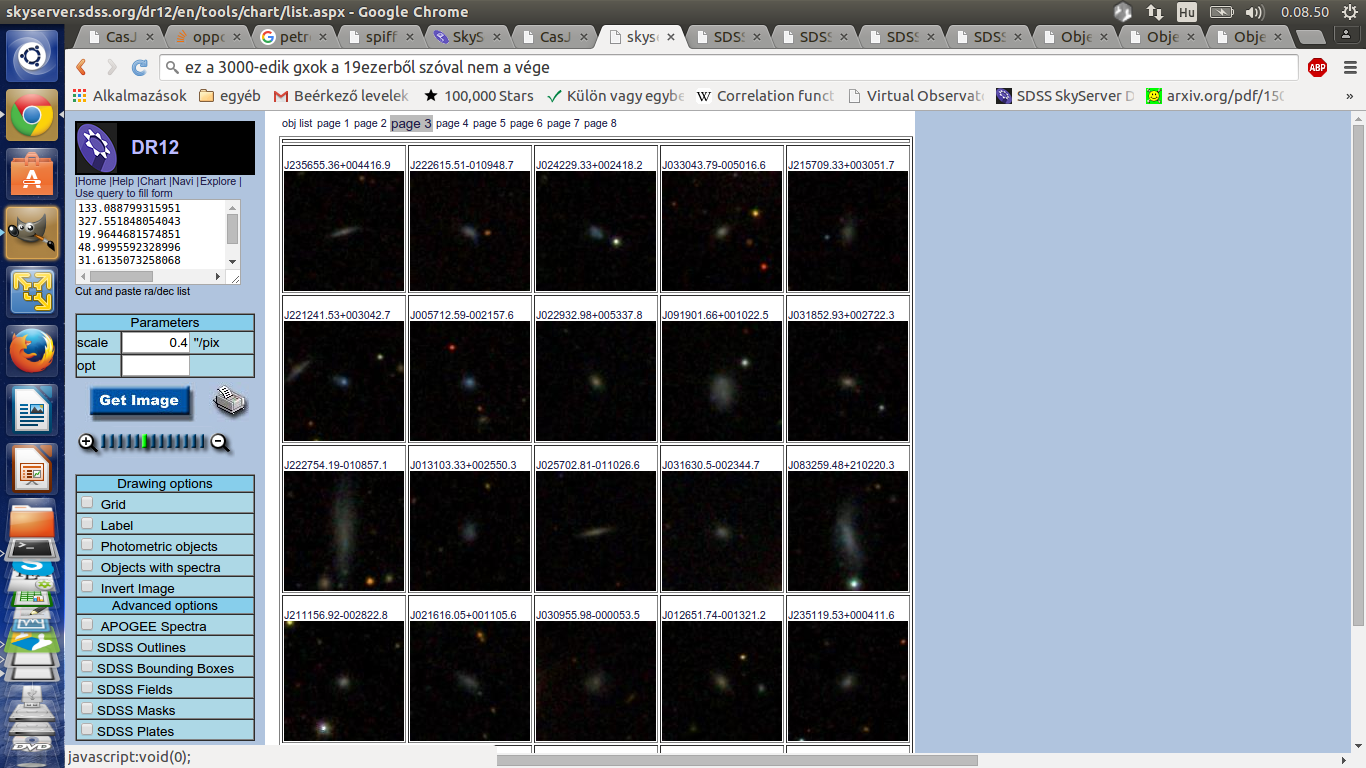

In [2]:
Image(filename='galaxies.png')

In [ ]:
--SELECT COUNT(*)
SELECT TOP 1000 g.ra, g.dec,   w.j_m_2mass, w.w1mag--,g.r, g.petroRad_u,  g.petroRad_z,  g.petroRad_r,  g.petroRad_g,  g.petroRad_i 
FROM WISE_xmatch x
  INNER JOIN Galaxy g ON g.objID = x.sdss_objid
  INNER JOIN wise_allsky w ON w.cntr = x.wise_cntr
  INNER JOIN SpecObj s ON s.bestObjID = g.objID
--WHERE g.ra BETWEEN 327.5 AND 338.5 AND g.dec BETWEEN -1.25 AND 1.25
--  AND
WHERE 
  ABS(g.b) > 10 AND
  --  s.z BETWEEN 0.02 AND 0.025
  s.z < 0.025 AND s.snMedian_r > 2
 AND s.class = 'GALAXY'
AND  (flags_r & 0x10000000) != 0 --/ BINNED1
AND (flags_r & 0x40000) = 0 --/ not SATURATED
  AND (flags_r & 0x80) = 0 --/ not NOPROFILE
AND  (flags_r & 0x20) = 0 --/ not PEAKCENTER
AND (flags_r & 0x80000) = 0 --/ not NOTCHECKED
  AND ((flags_r & 0x400000000000) = 0 OR psfmagerr_r <= 0.2) --/ high S/N or not DEBLEND_NOPEAK
  AND g.petroRad_u > 3 AND g.petroRad_z > 3 AND g.petroRad_r > 3 AND g.petroRad_g > 3 AND g.petroRad_i > 3
  AND moon_lev1 < 3 AND moon_lev2 < 3 AND moon_lev3 < 3 AND moon_lev4 < 3 
  AND w.w1mag >= 12 AND w.j_m_2mass < 9999 
 ORDER BY g.r DESC

7228 galaxis maradt, amire teljesülnek a feltételek

Csillagokra hazsnáltam a következő kódot:

In [3]:
--SELECT COUNT(*)
SELECT TOP 3000 g.ra, g.dec--,   w.j_m_2mass, w.w1mag--,g.r, g.petroRad_u,  g.petroRad_z,  g.petroRad_r,  g.petroRad_g,  g.petroRad_i 
FROM WISE_xmatch x
  INNER JOIN Star g ON g.objID = x.sdss_objid
  INNER JOIN wise_allsky w ON w.cntr = x.wise_cntr
  INNER JOIN SpecObj s ON s.bestObjID = g.objID
--WHERE g.ra BETWEEN 327.5 AND 338.5 AND g.dec BETWEEN -1.25 AND 1.25
  --  AND
INTO finalstarsallll 
WHERE 
  ABS(g.b) > 10 AND
  --  s.z BETWEEN 0.02 AND 0.025
  s.z < 0.0001  AND s.snMedian_r > 2
 AND s.class = 'STAR'
AND  (flags_r & 0x10000000) != 0 --/ BINNED1
AND (flags_r & 0x40000) = 0 --/ not SATURATED
  AND (flags_r & 0x80) = 0 --/ not NOPROFILE
AND  (flags_r & 0x20) = 0 --/ not PEAKCENTER
AND (flags_r & 0x80000) = 0 --/ not NOTCHECKED
  AND ((flags_r & 0x400000000000) = 0 OR psfmagerr_r <= 0.2) --/ high S/N or not DEBLEND_NOPEAK
--  AND g.petroRad_u > 3 AND g.petroRad_z > 3 AND g.petroRad_r > 3 AND g.petroRad_g > 3 AND g.petroRad_i > 3
  AND moon_lev1 < 3 AND moon_lev2 < 3 AND moon_lev3 < 3 AND moon_lev4 < 3 
  AND w.w1mag >= 12 AND w.j_m_2mass < 9999 
ORDER BY g.r DESC

SyntaxError: invalid syntax (<ipython-input-3-d96d537be647>, line 1)

A galaxisok 84 %-a rendesen lett klasszifikálva és 5 % lett a kontamináció.

In [1]:
from IPython.display import Image

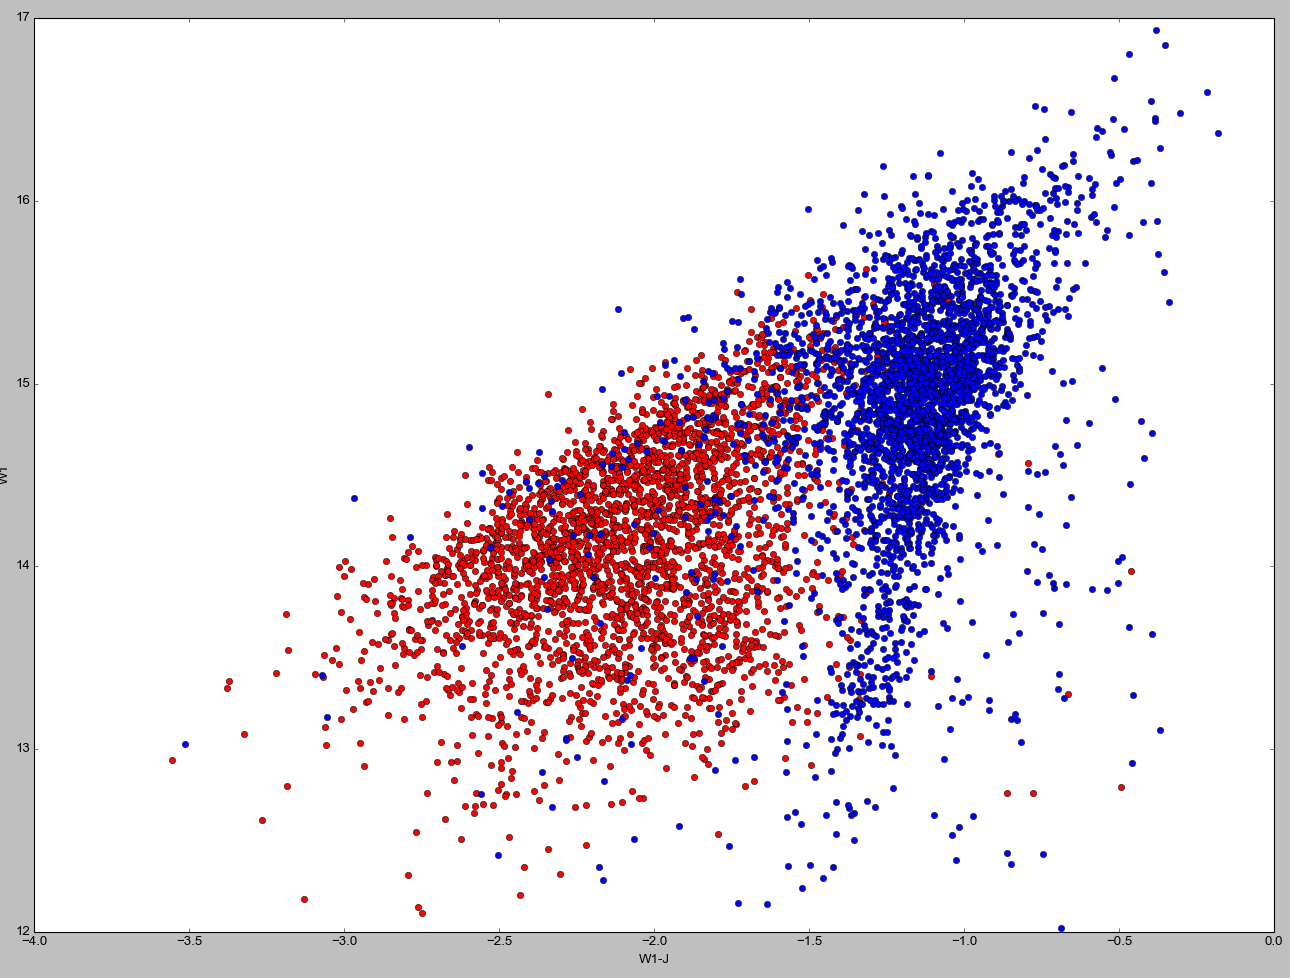

In [5]:
Image(filename='finalgood.png')